In [1]:
# !pip install wordcloud

# 실습 1

In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

f_name = './data/littleprince_djvu.txt'
with open(f_name) as f:   # utf - 8 또는 cp949 오류가 날때 >> with open(f_name, encoding = 'utf-8' 또는 'cp949' 추가)
    text = f.read() # 파일 내용 읽기

print(text[:100])
print(text[-100:])

THE LITTLE PRINCE 

Antoine De Saint-Exupery 

Antoine de Saint-Exupery, who was a French author, jo
ill know who he is. If this should happen, please comfort 
me. Send me word that he has come back. 



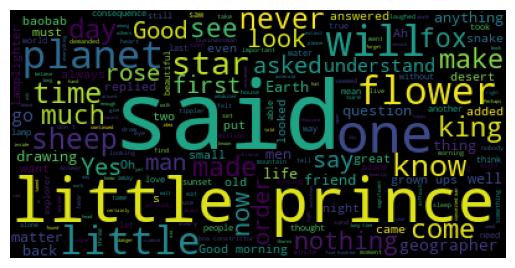

In [3]:
## 워드 클라우드의 이미지 생성

wc_img = WordCloud().generate(text)

# 생성 워드클라우드의 이미지를 화면에 표시
plt.imshow(wc_img)
plt.axis('off');

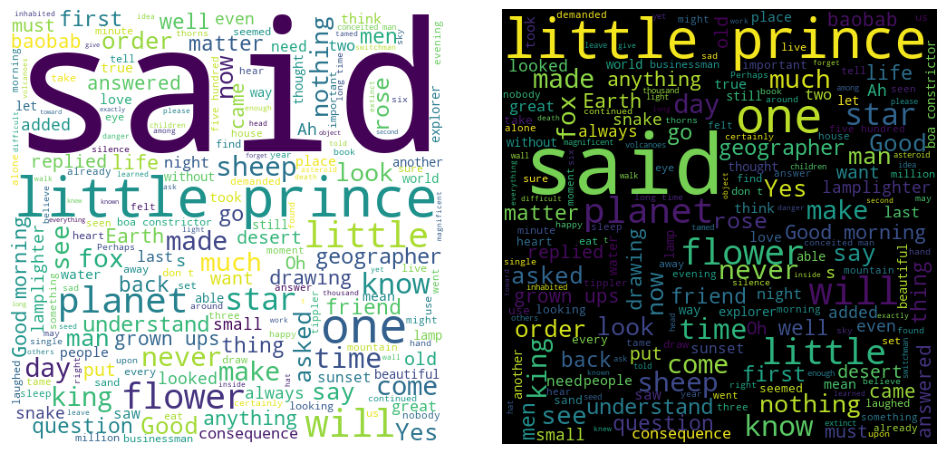

In [4]:
white_wordcloud = WordCloud(max_font_size = 300,
                        width=480, height=480,
                      background_color='white').generate(text)

black_wordcloud = WordCloud(width=480, height=480,
                      background_color='black').generate(text)


fig,ax = plt.subplots(1,2, figsize=(10,5))
fig.tight_layout();

ax[0].imshow(white_wordcloud)
ax[0].axis('off');

ax[1].imshow(black_wordcloud)
ax[1].axis('off');

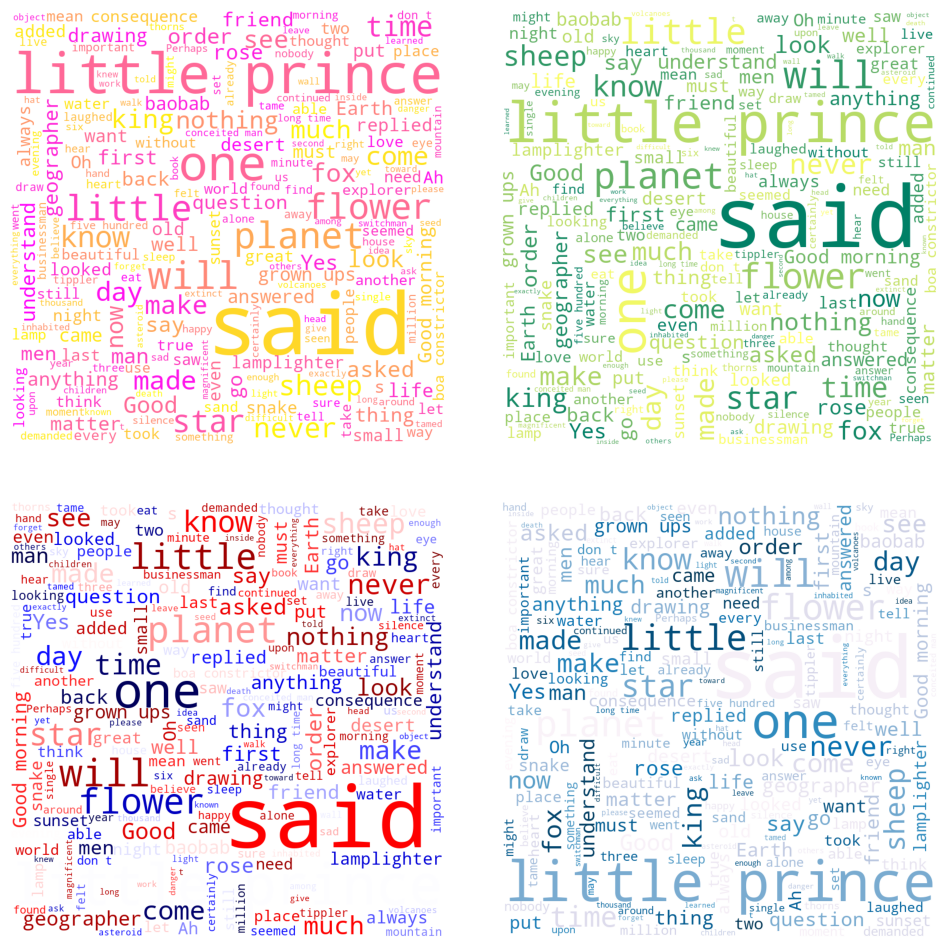

In [5]:
palettes = ['spring', 'summer', 'seismic','PuBu']
fig,ax = plt.subplots(2,2, figsize = (10,10))
fig.tight_layout()
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1]]
# plt.subplots_adjust(wspace=0.1, 
#                     hspace=0.1)

for i in range(4):
    wordcloud = WordCloud(background_color = 'white',
                      width = 800, height=800,
                      colormap = palettes[i]).generate(text)
    axes[i].imshow(wordcloud)
    axes[i].axis('off')

# 실습 2

In [6]:
# Transformer pdf를 python으로 읽어오기
from pdfminer.high_level import extract_text

pdf_transformer = extract_text('./data/transformer.pdf')
print(pdf_transformer[:100], pdf_transformer[-100:])

Attention Is All You Need

Ashish Vaswani∗
Google Brain
avaswani@google.com

Noam Shazeer∗
Google Br els with
fast-forward connections for neural machine translation. CoRR, abs/1606.04199, 2016.

11




In [7]:
# 읽어온 텍스트를 Transforer.txt를 생성하여 넣어주기
f = open('Transformer.txt','w',encoding='utf-8')
f.write(pdf_transformer)

33021

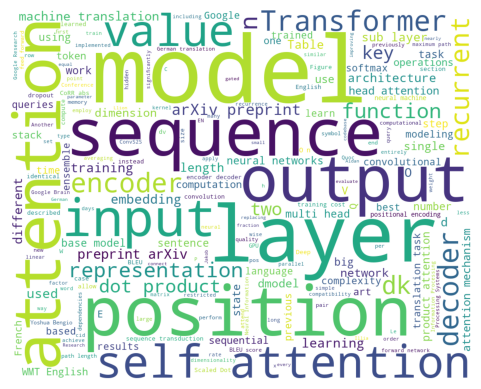

In [8]:
f_name = './data/Transformer.txt'
with open(f_name, encoding = 'utf-8') as f:   # utf - 8 또는 cp949 오류가 날때 >> with open(f_name, encoding = 'utf-8' 또는 'cp949' 추가)
    text = f.read() # 파일 내용 읽기


wc_img = WordCloud(background_color='white', width = 1000, height = 800,
                  max_font_size = 200).generate(text)

plt.imshow(wc_img)
plt.axis('off');

### 마스크 입히기

In [9]:
from PIL import Image
import numpy as np

RGBA


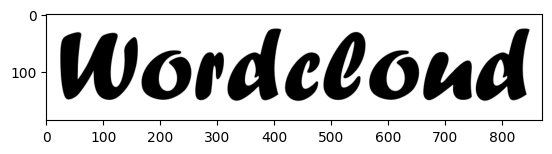

In [10]:
# 마스크가 될 이미지 불러오기
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

icon = Image.open("./data/word_cloud_mask_img/wordcloud.png")
print(icon.mode)  # Check the mode of the image

# Convert the image to include an alpha channel if needed
icon = icon.convert("RGBA")

# Create a new image with an alpha channel for the mask
mask = Image.new("RGBA", icon.size, (255, 255, 255, 0))

# Paste the icon onto the mask
mask.paste(icon, (0, 0), icon)

# Convert the mask to a numpy array
mask = np.array(mask)

# Display the result
plt.imshow(mask)
plt.show()

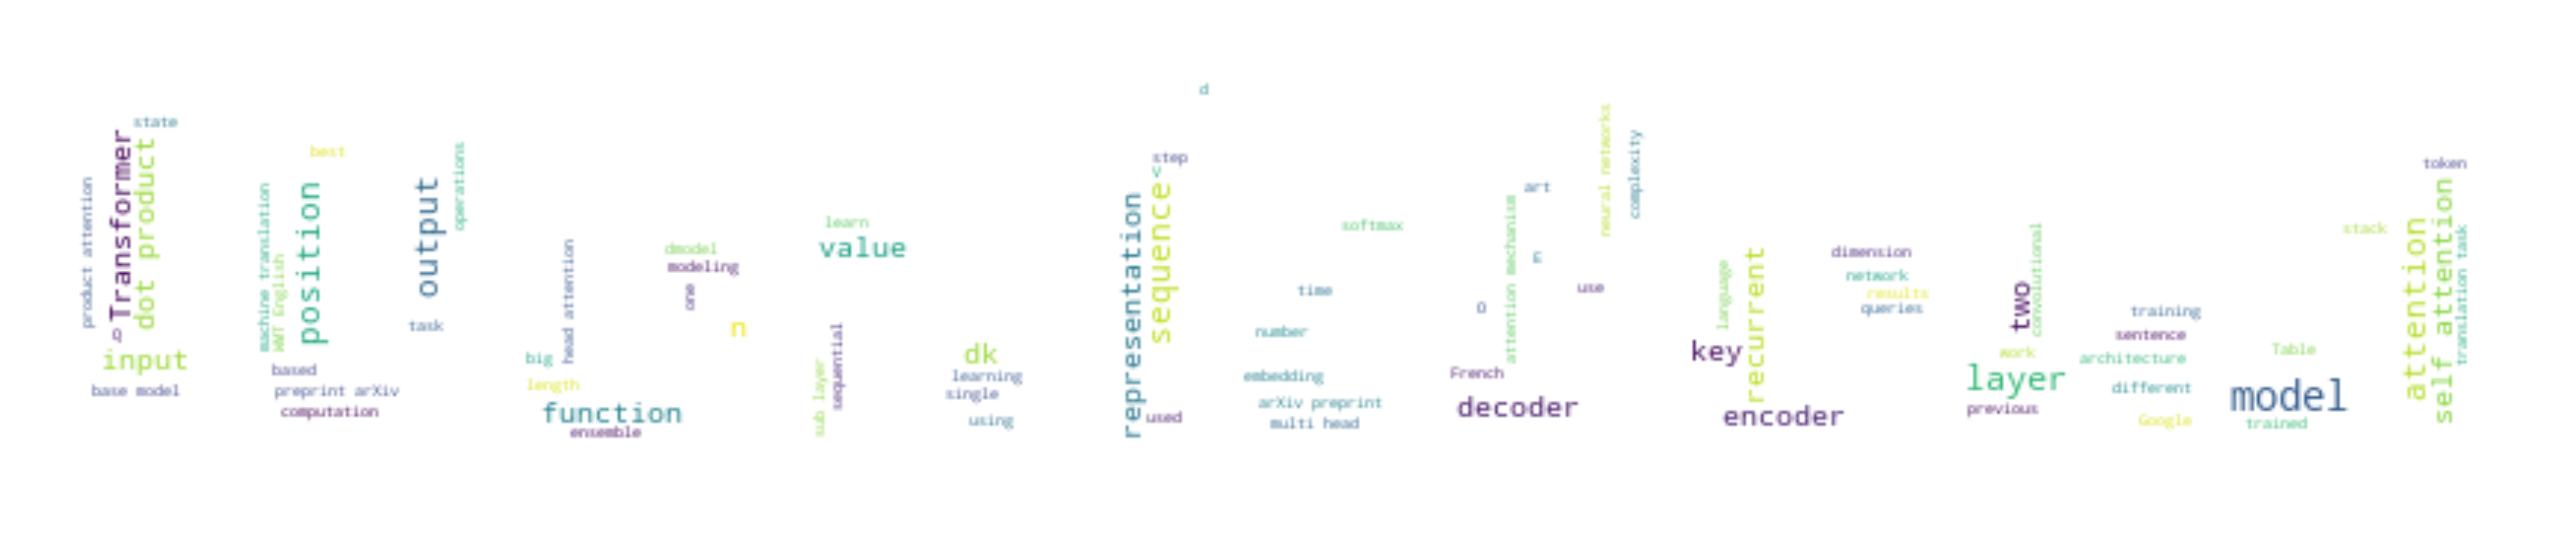

In [11]:
wc = WordCloud( max_font_size = 500,
               background_color='white',       #배경색
               width=800, height=200,          #사이즈설정
#                max_words=200,                #단어갯수
               mask=mask)                      #마스크설정   

cloud = wc.generate(text)                            #사전형태의 데이터

plt.figure(figsize=(100,200))                                           #액자사이즈설정
plt.axis('off')                                                       #테두리 선 없애기
plt.imshow(cloud,interpolation="bilinear")